In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from seirt_mesa import SEIRTModel
from cpyment import CModel

In [418]:
from seirt_opt import seirt_abm_gill

In [582]:
N = 10000
I0 = 0.01
c = 4
beta = 0.2
gamma = 0.1
delta = 0.3
theta = 0.1
kappa = 0.03
eta = 0.8

print('R0 = {0}'.format(beta*c/delta))

R0 = 2.666666666666667


In [571]:
tmax = 100
trajsGill = []

for i in range(10):
    print(i)
    trajsGill.append(np.array(seirt_abm_gill(tmax, N, int(I0*N), c, beta, gamma, delta, theta, kappa, eta)))

0
1
2
3
4
5
6
7
8
9


In [575]:
# Compartment version
cm = CModel('SEIRT')

etaeff = eta*0.35

cm.set_coupling_rate('S*I:S=>E', beta*c/N)
cm.set_coupling_rate('E:E=>I', gamma)
cm.set_coupling_rate('E:E=>T', etaeff*theta)
cm.set_coupling_rate('I:I=>R', delta)
cm.set_coupling_rate('I:I=>T', theta*(1+etaeff))
cm.set_coupling_rate('T:T=>R', kappa)

cmNoCT = CModel('SEIRT')

cmNoCT.set_coupling_rate('S*I:S=>E', beta*c/N)
cmNoCT.set_coupling_rate('E:E=>I', gamma)
cmNoCT.set_coupling_rate('I:I=>R', delta)
cmNoCT.set_coupling_rate('I:I=>T', theta)
cmNoCT.set_coupling_rate('T:T=>R', kappa)

In [576]:
t = np.linspace(0, tmax, 1000)
y0 = np.array([N-I0*N, 0, I0*N, 0, 0])

traj = cm.integrate(t, y0)
trajNoCT = cmNoCT.integrate(t, y0)

<IPython.core.display.Javascript object>


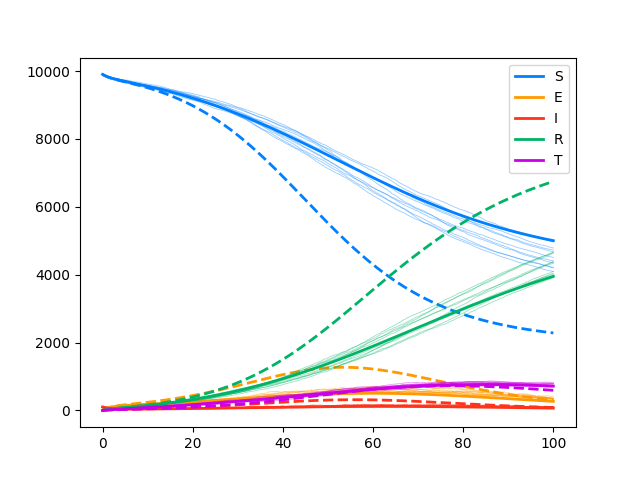

In [577]:
fig, ax = plt.subplots()

colors = [
    (0.0, 0.5, 1.0),
    (1.0, 0.6, 0.0),
    (1.0, 0.2, 0.1),
    (0.0, 0.7, 0.4),
    (0.8, 0.0, 0.9)
]

#ax.set_ylim(0,2000)
for i in range(5):
    ax.plot(t, traj['y'][:,i], c=colors[i], label='SEIRT'[i], lw=2.0)
    ax.plot(t, trajNoCT['y'][:,i], '--', c=colors[i], lw=2.0)
    for tG in trajsGill:
        ax.plot(tG[0], tG[i+1,:].T, c=list(colors[i]) + [0.4], lw=0.6)
    
ax.legend()

In [581]:
# This is to run the Mesa model, but frankly it's slow and pretty useless

In [ ]:
m = SEIRTModel(N, I0=I0, beta=beta*c, gamma=gamma, delta=delta, theta=theta, kappa=kappa, 
               eta = 0, dt=0.05)

In [ ]:
steps = 2000
for i in range(steps):
    m.step()

In [ ]:
df = m.datacollector.get_model_vars_dataframe()

In [ ]:
fig, ax = plt.subplots()

colors = [
    (0.0, 0.5, 1.0),
    (1.0, 0.6, 0.0),
    (1.0, 0.2, 0.1),
    (0.0, 0.7, 0.4),
    (0.8, 0.0, 0.9)
]

ax.set_ylim(0, 500)
for i in range(5):
    ax.plot(t, traj['y'][:,i], c=colors[i], label='SEIRT'[i], lw=2.0)
    ax.plot(t, trajNoCT['y'][:,i], '--', c=colors[i], lw=2.0)
    ax.plot(t, df.values[:,i+1], c=colors[i], lw=0.6)
    
ax.legend()